In [26]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def extract_data(base_url="https://data.pa.gov/resource/mcba-yywm.csv",limit=50000):
    offset = 0
    all_dfs = []
    
    while True:
        page_url = f"{base_url}?$limit={limit}&$offset={offset}"
        print(f"Retrieving rows from offset {offset}")
        
        try:
            df_chunk = pd.read_csv(page_url)
        except Exception as e:
            print(f"Error while fetching data at offset {offset}: {e}")
            break

        if df_chunk.empty:
            break

        all_dfs.append(df_chunk)
        offset += limit

    # Combining all chunks into one DataFrame
    final_df = pd.concat(all_dfs, ignore_index=True)
    return final_df

df = extract_data(base_url="https://data.pa.gov/resource/mcba-yywm.csv",limit=50000)

Retrieving rows from offset 0
Retrieving rows from offset 50000
Retrieving rows from offset 100000
Retrieving rows from offset 150000
Retrieving rows from offset 200000
Retrieving rows from offset 250000
Retrieving rows from offset 300000
Retrieving rows from offset 350000
Retrieving rows from offset 400000
Retrieving rows from offset 450000
Retrieving rows from offset 500000
Retrieving rows from offset 550000
Retrieving rows from offset 600000
Retrieving rows from offset 650000
Retrieving rows from offset 700000
Retrieving rows from offset 750000
Retrieving rows from offset 800000
Retrieving rows from offset 850000
Retrieving rows from offset 900000
Retrieving rows from offset 950000
Retrieving rows from offset 1000000
Retrieving rows from offset 1050000
Retrieving rows from offset 1100000
Retrieving rows from offset 1150000
Retrieving rows from offset 1200000
Retrieving rows from offset 1250000
Retrieving rows from offset 1300000
Retrieving rows from offset 1350000
Retrieving rows fr

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079710 entries, 0 to 3079709
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   countyname           object        
 1   party                object        
 2   dateofbirth          datetime64[ns]
 3   yr_born              Int64         
 4   mailapplicationtype  object        
 5   appissuedate         object        
 6   appreturndate        object        
 7   ballotsentdate       object        
 8   ballotreturneddate   object        
 9   legislative          object        
 10  senate               object        
 11  congressional        object        
dtypes: Int64(1), datetime64[ns](1), object(10)
memory usage: 284.9+ MB


In [50]:
print(df.describe())

                         dateofbirth      yr_born
count                        3077488    3077488.0
mean   1966-04-30 13:48:44.734458832  1965.827095
min              1800-01-01 00:00:00       1800.0
25%              1951-02-02 00:00:00       1951.0
50%              1963-07-18 00:00:00       1963.0
75%              1983-06-17 00:00:00       1983.0
max              2006-07-14 00:00:00       2006.0
std                              NaN    19.654231


In [13]:
print("Missing values by column:")
missing_values = df.isnull().sum()
print(missing_values)

Missing values by column:
countyname                  0
party                    4301
dateofbirth              2222
mailapplicationtype         0
appissuedate               36
appreturndate              45
ballotsentdate          17911
ballotreturneddate     431654
legislative                87
senate                     87
congressional              87
dtype: int64


In [14]:
for col, missing_count in missing_values.items():
    if missing_count > 0:
        percentage = (missing_count / len(df)) * 100
        print(f"  {col}: {missing_count:,} ({percentage:.1f}%)")

print(f"\nTotal records: {len(df):,}")

  party: 4,301 (0.1%)
  dateofbirth: 2,222 (0.1%)
  appissuedate: 36 (0.0%)
  appreturndate: 45 (0.0%)
  ballotsentdate: 17,911 (0.6%)
  ballotreturneddate: 431,654 (14.0%)
  legislative: 87 (0.0%)
  senate: 87 (0.0%)
  congressional: 87 (0.0%)

Total records: 3,079,710


In [18]:
print("=== DATASET OVERVIEW ===")
print(f"Total records: {len(df):,}")
print(f"Columns: {df.shape[1]}")

=== DATASET OVERVIEW ===
Total records: 3,079,710
Columns: 11


In [ ]:
# 1.Key finding
unreturned_ballots = df['ballotreturneddate'].isnull().sum()
unreturned_rate = (unreturned_ballots / len(df)) * 100
print(f"\n CRITICAL FINDING:")
print(f"   • Unreturned ballots: {unreturned_ballots:,} ({unreturned_rate:.1f}%)")
print(f"   • This represents a significant portion of mail ballot requests!")



 CRITICAL FINDING:
   • Unreturned ballots: 431,654 (14.0%)
   • This represents a significant portion of mail ballot requests!


In [35]:
df.head()

,countyname,party,dateofbirth,yr_born,mailapplicationtype,appissuedate,appreturndate,ballotsentdate,ballotreturneddate,legislative,senate,congressional
0,SCHUYLKILL,NOP,1946-11-11,1946,MAILIN,2020-08-27T00:00:00.000,2020-08-27T00:00:00.000,2020-08-27T00:00:00.000,2020-10-23T00:00:00.000,123RD LEGISLATIVE DISTRICT,29TH SENATORIAL DISTRICT,9TH CONGRESSIONAL DISTRICT
1,DELAWARE,D,2002-07-25,2002,OLMAILV,2020-09-01T00:00:00.000,2020-09-01T00:00:00.000,2020-10-03T00:00:00.000,2020-10-21T00:00:00.000,161ST LEGISLATIVE DISTRICT,26TH SENATORIAL DISTRICT,5TH CONGRESSIONAL DISTRICT
2,BERKS,D,1998-10-04,1998,OLMAILV,2020-04-15T00:00:00.000,2020-04-15T00:00:00.000,2020-10-07T00:00:00.000,2020-10-21T00:00:00.000,129TH LEGISLATIVE DISTRICT,29TH SENATORIAL DISTRICT,9TH CONGRESSIONAL DISTRICT
3,BEAVER,D,1963-11-18,1963,OLMAILV,2020-08-05T00:00:00.000,2020-08-05T00:00:00.000,2020-09-24T00:00:00.000,2020-10-19T00:00:00.000,15TH LEGISLATIVE DISTRICT,47TH SENATORIAL DISTRICT,17TH CONGRESSIONAL DISTRICT
4,DAUPHIN,D,1963-01-11,1963,OLMAILV,2020-04-10T00:00:00.000,2020-04-10T00:00:00.000,2020-10-05T00:00:00.000,2020-10-19T00:00:00.000,106TH LEGISLATIVE DISTRICT,48TH SENATORIAL DISTRICT,10TH CONGRESSIONAL DISTRICT


In [64]:
 print(df['mailapplicationtype'].value_counts())

mailapplicationtype
OLMAILV     1406669
MAILIN      1235014
OLREGV       326898
REG           57928
F             11986
CVO           11362
M             11134
OLMAILNV       5697
OLREGNV        4919
C              4824
CIV            2492
PER             191
PMI             167
CRI             146
MRI              99
BV               91
ALT              85
V                 8
Name: count, dtype: int64


In [54]:
for col in df.columns:
    print(df[col].value_counts())

countyname
PHILADELPHIA    437159
ALLEGHENY       411251
MONTGOMERY      273270
BUCKS           192074
CHESTER         167261
                 ...  
POTTER            1955
FULTON            1336
SULLIVAN           921
FOREST             842
CAMERON            810
Name: count, Length: 67, dtype: int64
party
D      1940836
R       772318
NF      257222
I        31917
NOP      22289
        ...   
MU           1
ND           1
TPP          1
ACO          1
OWW          1
Name: count, Length: 206, dtype: int64
dateofbirth
1954-07-15    236
1956-09-21    233
1957-09-04    233
1957-07-23    232
1954-09-25    231
             ... 
1922-09-18      1
1922-04-20      1
1918-03-06      1
1918-06-28      1
1917-12-19      1
Name: count, Length: 30854, dtype: int64
yr_born
1954    66084
1957    65784
1956    65714
1952    65451
1955    65289
        ...  
1903        1
1898        1
1897        1
1895        1
1910        1
Name: count, Length: 110, dtype: Int64
mailapplicationtype
OLMAILV     1406

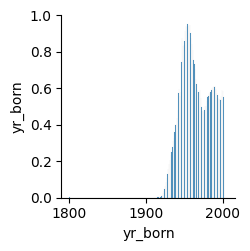

In [34]:
sns.pairplot(df)

GEOGRAPHIC PATTERNS
Geographic analysis: 3,079,710 records

Top 10 Counties:
 1. PHILADELPHIA: 437,159 (14.2%)
 2. ALLEGHENY: 411,251 (13.4%)
 3. MONTGOMERY: 273,270 (8.9%)
 4. BUCKS: 192,074 (6.2%)
 5. CHESTER: 167,261 (5.4%)
 6. DELAWARE: 150,369 (4.9%)
 7. LANCASTER: 107,567 (3.5%)
 8. YORK: 92,458 (3.0%)
 9. LEHIGH: 87,328 (2.8%)
10. NORTHAMPTON: 82,762 (2.7%)


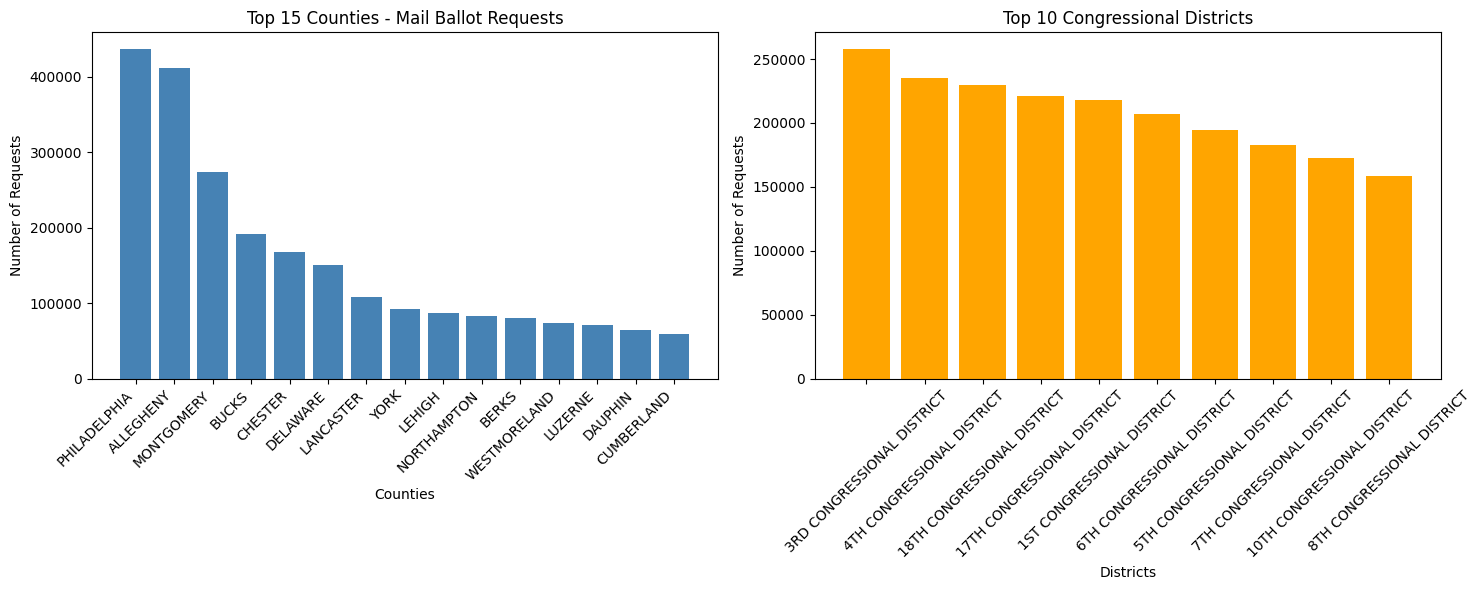

In [28]:
# 1. geographic analysis

print("GEOGRAPHIC PATTERNS")

# Remove missing county data
df_geo = df.dropna(subset=['countyname'])
print(f"Geographic analysis: {len(df_geo):,} records")

# Top counties
counties = df_geo['countyname'].value_counts().head(10)
print("\nTop 10 Counties:")
for i, (county, count) in enumerate(counties.items(), 1):
    pct = (count / len(df_geo)) * 100
    print(f"{i:2d}. {county}: {count:,} ({pct:.1f}%)")

# Plot counties
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
top15_counties = df_geo['countyname'].value_counts().head(15)
plt.bar(range(len(top15_counties)), top15_counties.values, color='steelblue')
plt.title('Top 15 Counties - Mail Ballot Requests')
plt.xlabel('Counties')
plt.ylabel('Number of Requests')
plt.xticks(range(len(top15_counties)), top15_counties.index, rotation=45, ha='right')

plt.subplot(1, 2, 2)
congress = df_geo['congressional'].value_counts().head(10)
plt.bar(range(len(congress)), congress.values, color='orange')
plt.title('Top 10 Congressional Districts')
plt.xlabel('Districts')
plt.ylabel('Number of Requests')
plt.xticks(range(len(congress)), congress.index, rotation=45)

plt.tight_layout()
plt.show()


In [30]:
def add_birth_year_column(df):
    df['dateofbirth'] = pd.to_datetime(df['dateofbirth'], errors='coerce')
    df['yr_born'] = df['dateofbirth'].dt.year.astype('Int64')
    cols = list(df.columns) # lists all the columns
    dob_index = cols.index('dateofbirth') # finds the index of dateofbirth column
    cols.insert(dob_index + 1, cols.pop(cols.index('yr_born'))) # pops the yr_born and places it beside the dob_index
    df = df[cols] # reorders the actual dataframe columns
    return df
df = add_birth_year_column(df)

AGE PATTERNS


/var/folders/yg/pct_bsld6v30xnkf3h453hs40000gn/T/ipykernel_26592/1391236688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['age_2020'] = 2020 - df_age['yr_born']


Age analysis: 3,077,392 records
Age range: 18 to 110
Median age: 57
Mean age: 54.2

Age group breakdown:
18-29: 472,225 (15.3%)
30-39: 406,240 (13.2%)
40-49: 351,969 (11.4%)
50-59: 477,181 (15.5%)
60-69: 639,705 (20.8%)
70-79: 452,048 (14.7%)
80+: 252,263 (8.2%)


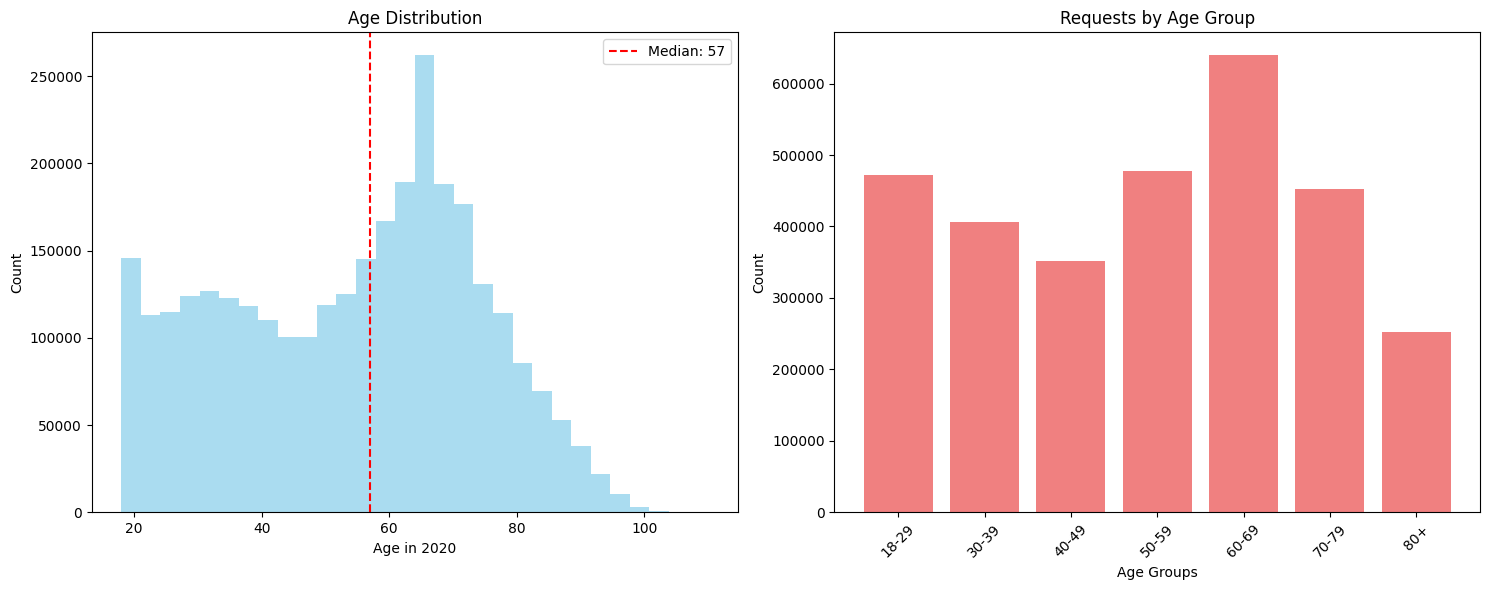

AGE INSIGHTS:
• Seniors (65+): 35.4% of mail voters
• Young voters (<35): 21.7%


In [32]:
print("AGE PATTERNS")

# Clean age data
df_age = df.dropna(subset=['dateofbirth'])
df_age['age_2020'] = 2020 - df_age['yr_born']
df_age = df_age[(df_age['age_2020'] >= 18) & (df_age['age_2020'] <= 110)]
print(f"Age analysis: {len(df_age):,} records")

# Age stats
print(f"Age range: {df_age['age_2020'].min()} to {df_age['age_2020'].max()}")
print(f"Median age: {df_age['age_2020'].median():.0f}")
print(f"Mean age: {df_age['age_2020'].mean():.1f}")

# Age groups
df_age['age_group'] = pd.cut(df_age['age_2020'], 
                            bins=[18, 30, 40, 50, 60, 70, 80, 110], 
                            labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])

age_counts = df_age['age_group'].value_counts().sort_index()
print("\nAge group breakdown:")
for group, count in age_counts.items():
    pct = (count / len(df_age)) * 100
    print(f"{group}: {count:,} ({pct:.1f}%)")

# Plot age distribution
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(df_age['age_2020'], bins=30, color='skyblue', alpha=0.7)
plt.axvline(df_age['age_2020'].median(), color='red', linestyle='--', 
           label=f'Median: {df_age["age_2020"].median():.0f}')
plt.title('Age Distribution')
plt.xlabel('Age in 2020')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(range(len(age_counts)), age_counts.values, color='lightcoral')
plt.title('Requests by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(range(len(age_counts)), age_counts.index, rotation=45)

plt.tight_layout()
plt.show()

# Key age insights
seniors = (df_age['age_2020'] >= 65).sum()
seniors_pct = (seniors / len(df_age)) * 100
young = (df_age['age_2020'] < 35).sum()
young_pct = (young / len(df_age)) * 100

print(f"AGE INSIGHTS:")
print(f"• Seniors (65+): {seniors_pct:.1f}% of mail voters")
print(f"• Young voters (<35): {young_pct:.1f}%")

# %%

PARTY PATTERNS
Party analysis: 3,075,409 records
Total unique parties: 206

Top 10 parties and voting percentages:
 1. D: 1,940,836 (63.1%)
 2. R: 772,318 (25.1%)
 3. NF: 257,222 (8.4%)
 4. I: 31,917 (1.0%)
 5. NOP: 22,289 (0.7%)
 6. NO: 17,627 (0.6%)
 7. LN: 10,591 (0.3%)
 8. OTH: 8,859 (0.3%)
 9. NON: 7,033 (0.2%)
10. GR: 3,223 (0.1%)


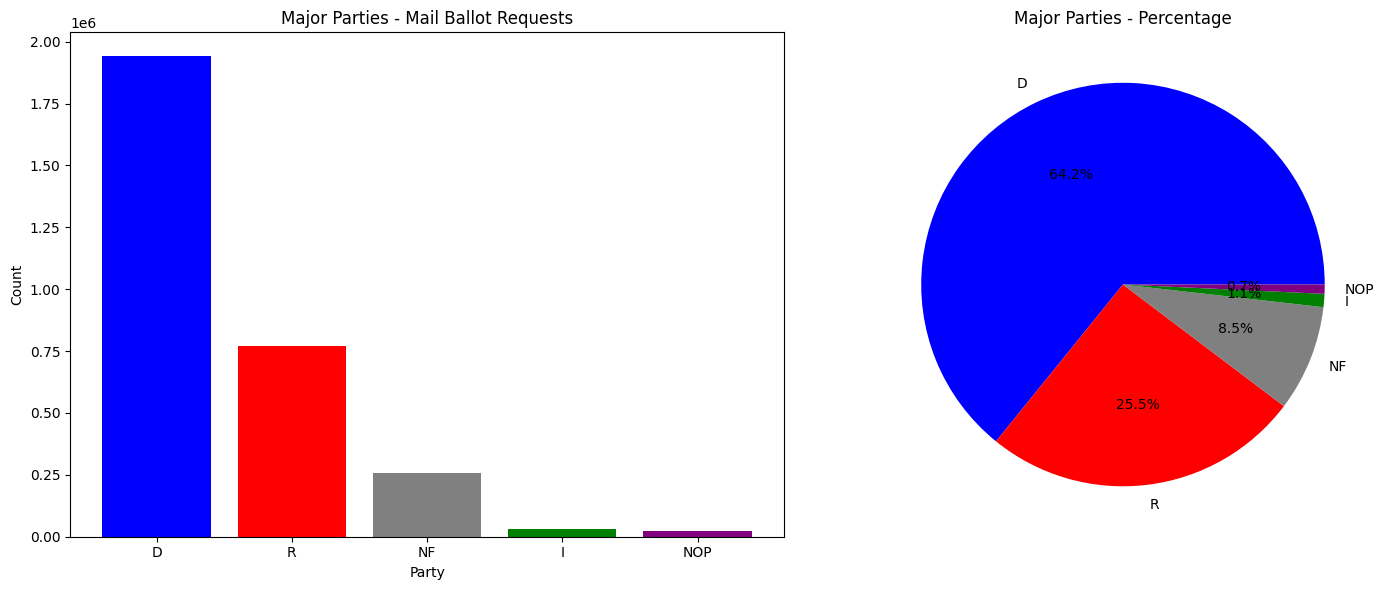

In [40]:
print("PARTY PATTERNS")

# Clean party data
df_party = df.dropna(subset=['party'])
print(f"Party analysis: {len(df_party):,} records")

# All parties
all_parties = df_party['party'].value_counts()
print(f"Total unique parties: {len(all_parties)}")

print("\nTop 10 parties and voting percentages:")
for i, (party, count) in enumerate(all_parties.head(10).items(), 1):
    pct = (count / len(df_party)) * 100
    print(f"{i:2d}. {party}: {count:,} ({pct:.1f}%)")

# Focus on major parties
major_parties = ['D', 'R', 'NF', 'I', 'NOP']
df_major = df_party[df_party['party'].isin(major_parties)]


# Plot party distribution
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
major_counts = df_major['party'].value_counts()
colors = ['blue', 'red', 'gray', 'green', 'purple']
plt.bar(major_counts.index, major_counts.values, color=colors)
plt.title('Major Parties - Mail Ballot Requests')
plt.xlabel('Party')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
major_pct = df_major['party'].value_counts(normalize=True) * 100
plt.pie(major_pct.values, labels=major_pct.index, autopct='%1.1f%%', colors=colors)
plt.title('Major Parties - Percentage')
plt.tight_layout()
plt.show()


 AGE-PARTY RELATIONSHIP


/var/folders/yg/pct_bsld6v30xnkf3h453hs40000gn/T/ipykernel_26592/1631191349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_party['age_2020'] = 2020 - df_age_party['yr_born']


Age group by party (counts):
party           D     NF       R
age_group                       
18-29      307495  66586   84380
30-39      269672  55593   66629
40-49      224439  40316   71673
50-59      295107  35013  127670
60-69      412044  32251  172445
70-79      277075  17559  143031
80+        139670   5991  100438

Age group by party (percentages):
party         D    NF     R
age_group                  
18-29      67.1  14.5  18.4
30-39      68.8  14.2  17.0
40-49      66.7  12.0  21.3
50-59      64.5   7.6  27.9
60-69      66.8   5.2  28.0
70-79      63.3   4.0  32.7
80+        56.8   2.4  40.8


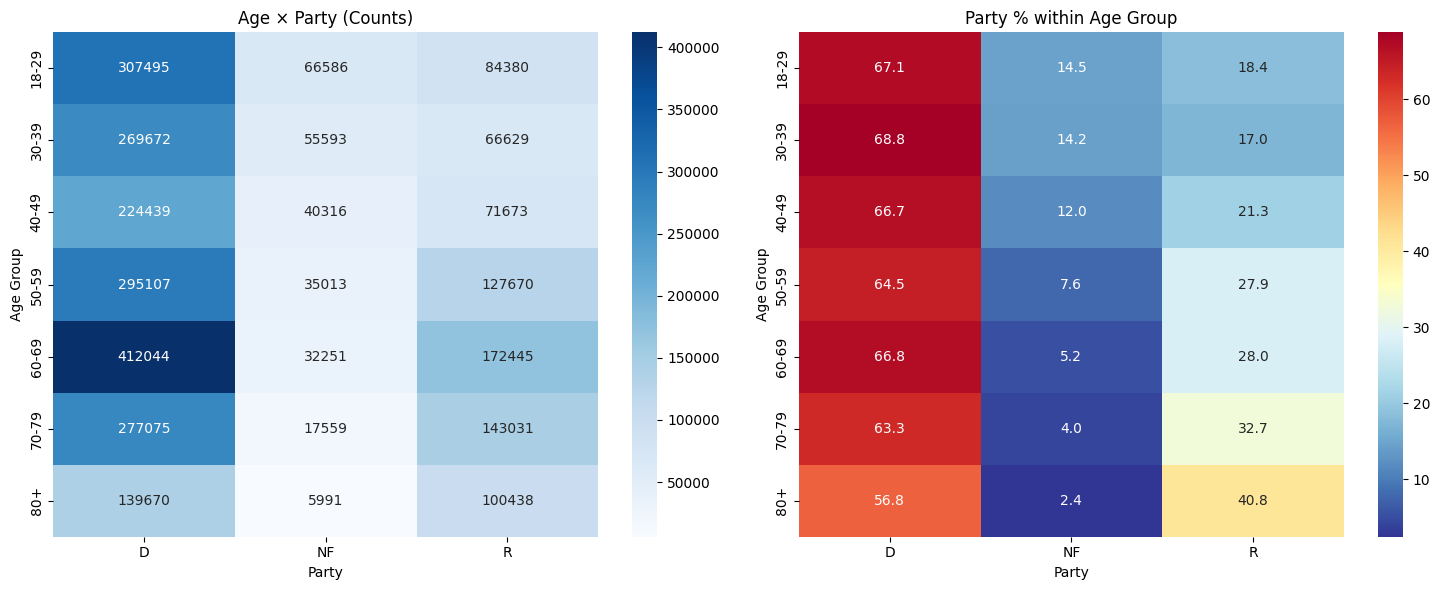


Average age by party:
• R: 59.1 years
• D: 53.5 years
• NF: 44.2 years


In [57]:
print("\n AGE-PARTY RELATIONSHIP")

# Combine age and party data
df_age_party = df.dropna(subset=['dateofbirth', 'party'])
df_age_party['age_2020'] = 2020 - df_age_party['yr_born']
df_age_party = df_age_party[(df_age_party['age_2020'] >= 18) & (df_age_party['age_2020'] <= 110)]
df_age_party['age_group'] = pd.cut(df_age_party['age_2020'], 
                                  bins=[18, 30, 40, 50, 60, 70, 80, 110], 
                                  labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])

# Focus on major parties
df_age_party_major = df_age_party[df_age_party['party'].isin(['D', 'R', 'NF'])]

# Cross-tabulation
crosstab = pd.crosstab(df_age_party_major['age_group'], df_age_party_major['party'])
crosstab_pct = pd.crosstab(df_age_party_major['age_group'], df_age_party_major['party'], normalize='index') * 100

print("Age group by party (counts):")
print(crosstab)

print("\nAge group by party (percentages):")
print(crosstab_pct.round(1))

# Plot heatmaps
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Age × Party (Counts)')
plt.ylabel('Age Group')
plt.xlabel('Party')

plt.subplot(1, 2, 2)
sns.heatmap(crosstab_pct, annot=True, fmt='.1f', cmap='RdYlBu_r')
plt.title('Party % within Age Group')
plt.ylabel('Age Group')
plt.xlabel('Party')

plt.tight_layout()
plt.show()

# Average age by party
avg_age = df_age_party_major.groupby('party')['age_2020'].mean().sort_values(ascending=False)
print(f"\nAverage age by party:")
for party, age in avg_age.items():
    print(f"• {party}: {age:.1f} years")




 TIMING PATTERNS
Timing analysis: 2,648,024 records


/var/folders/yg/pct_bsld6v30xnkf3h453hs40000gn/T/ipykernel_26592/3097061852.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timing['appissuedate'] = pd.to_datetime(df_timing['appissuedate'],errors = 'coerce')
/var/folders/yg/pct_bsld6v30xnkf3h453hs40000gn/T/ipykernel_26592/3097061852.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timing['ballotreturneddate'] = pd.to_datetime(df_timing['ballotreturneddate'])
/var/folders/yg/pct_bsld6v30xnkf3h453hs40000gn/T/ipykernel_26592/3097061852.py:12: Set

Valid timing records: 1,691,306
Median response time: 29 days
Mean response time: 32.0 days

Response time breakdown:
• Same day: 24,188 (1.4%)
• Within 1 week: 174,752 (10.3%)
• 30+ days: 828,803 (49.0%)


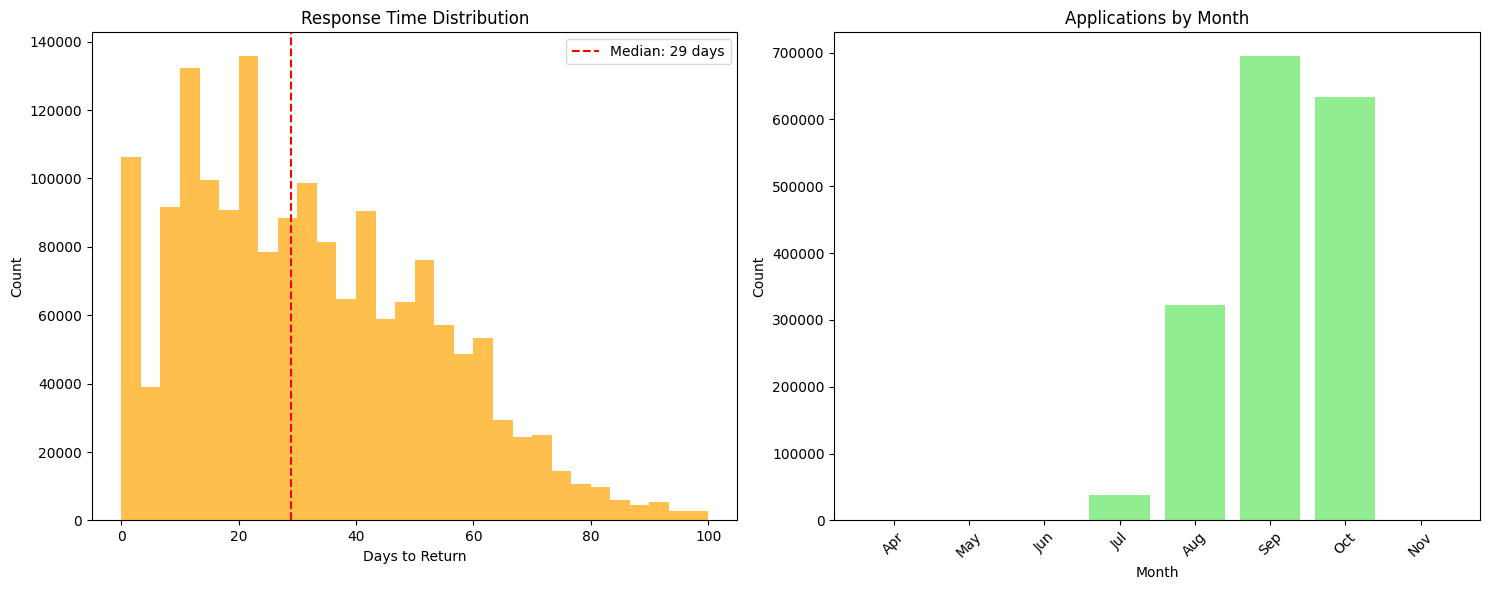

In [43]:
print("\n TIMING PATTERNS")

# Clean timing data
df_timing = df.dropna(subset=['appissuedate', 'ballotreturneddate'])
print(f"Timing analysis: {len(df_timing):,} records")

# Convert dates
df_timing['appissuedate'] = pd.to_datetime(df_timing['appissuedate'],errors = 'coerce')
df_timing['ballotreturneddate'] = pd.to_datetime(df_timing['ballotreturneddate'])

# Calculate latency
df_timing['days_to_return'] = (df_timing['ballotreturneddate'] - df_timing['appissuedate']).dt.days

# Filter realistic values
df_timing = df_timing[(df_timing['days_to_return'] >= 0) & (df_timing['days_to_return'] <= 100)]

print(f"Valid timing records: {len(df_timing):,}")
print(f"Median response time: {df_timing['days_to_return'].median():.0f} days")
print(f"Mean response time: {df_timing['days_to_return'].mean():.1f} days")

# Response time categories
same_day = (df_timing['days_to_return'] == 0).sum()
week_or_less = (df_timing['days_to_return'] <= 7).sum()
month_or_more = (df_timing['days_to_return'] >= 30).sum()

print(f"\nResponse time breakdown:")
print(f"• Same day: {same_day:,} ({same_day/len(df_timing)*100:.1f}%)")
print(f"• Within 1 week: {week_or_less:,} ({week_or_less/len(df_timing)*100:.1f}%)")
print(f"• 30+ days: {month_or_more:,} ({month_or_more/len(df_timing)*100:.1f}%)")

# Plot timing
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(df_timing['days_to_return'], bins=30, color='orange', alpha=0.7)
plt.axvline(df_timing['days_to_return'].median(), color='red', linestyle='--', 
           label=f'Median: {df_timing["days_to_return"].median():.0f} days')
plt.title('Response Time Distribution')
plt.xlabel('Days to Return')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
# Monthly patterns
df_timing['app_month'] = df_timing['appissuedate'].dt.month
monthly = df_timing['app_month'].value_counts().sort_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(monthly.index, monthly.values, color='lightgreen')
plt.title('Applications by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(monthly.index, [months[i-1] for i in monthly.index], rotation=45)

plt.tight_layout()
plt.show()


CONGRESSIONAL DISTRICT ANALYSIS
Congressional districts: 18
Total requests analyzed: 3,079,623

Top 5 districts:
1. District 3RD CONGRESSIONAL DISTRICT: 258,020 (8.4%)
2. District 4TH CONGRESSIONAL DISTRICT: 235,126 (7.6%)
3. District 18TH CONGRESSIONAL DISTRICT: 229,995 (7.5%)
4. District 17TH CONGRESSIONAL DISTRICT: 221,386 (7.2%)
5. District 1ST CONGRESSIONAL DISTRICT: 218,090 (7.1%)

Congressional District 3RD CONGRESSIONAL DISTRICT has the highest frequency
   • Requests: 258,020
   • Percentage: 8.4%


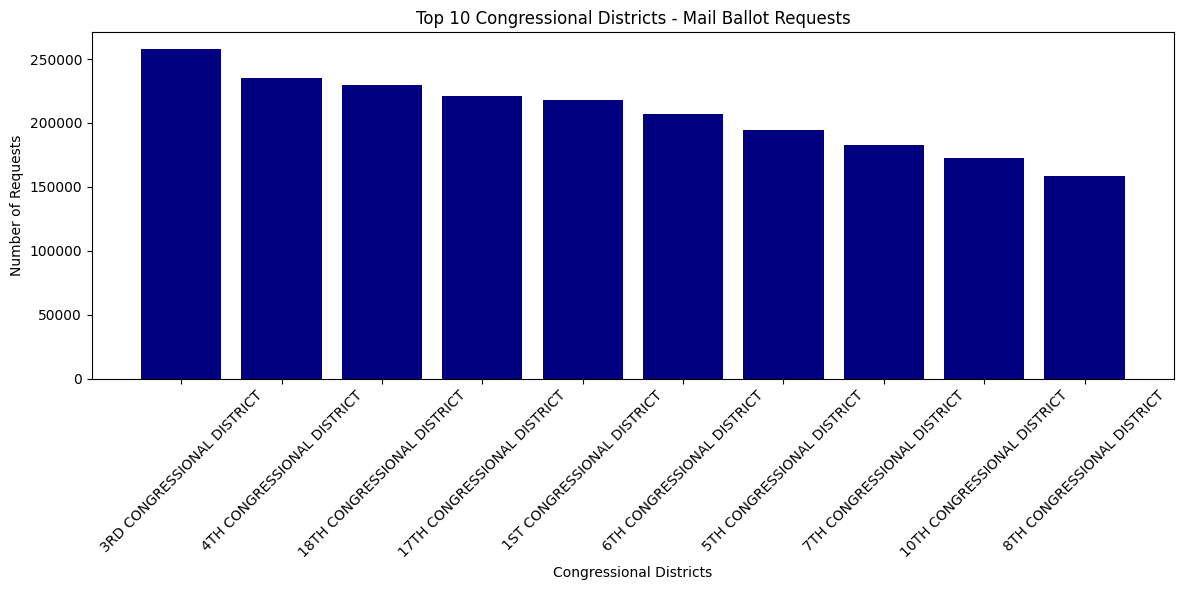

In [58]:
print("\nCONGRESSIONAL DISTRICT ANALYSIS")

# Clean congressional data
df_congress = df.dropna(subset=['congressional'])
congress_counts = df_congress['congressional'].value_counts()

print(f"Congressional districts: {len(congress_counts)}")
print(f"Total requests analyzed: {len(df_congress):,}")

print(f"\nTop 5 districts:")
for i, (district, count) in enumerate(congress_counts.head().items(), 1):
    pct = (count / len(df_congress)) * 100
    print(f"{i}. District {district}: {count:,} ({pct:.1f}%)")

# Answer the specific question
top_district = congress_counts.index[0]
top_count = congress_counts.iloc[0]
top_pct = (top_count / len(df_congress)) * 100

print(f"\nCongressional District {top_district} has the highest frequency")
print(f"   • Requests: {top_count:,}")
print(f"   • Percentage: {top_pct:.1f}%")

# Plot top 10 districts
plt.figure(figsize=(12, 6))
top10 = congress_counts.head(10)
plt.bar(range(len(top10)), top10.values, color='navy')
plt.title('Top 10 Congressional Districts - Mail Ballot Requests')
plt.xlabel('Congressional Districts')
plt.ylabel('Number of Requests')
plt.xticks(range(len(top10)), top10.index, rotation=45)
plt.tight_layout()
plt.show()



In [59]:
print("\nLEGISLATIVE DISTRICT LATENCY")

# Clean data for latency analysis
df_latency = df.dropna(subset=['appissuedate', 'ballotreturneddate', 'legislative'])
df_latency['appissuedate'] = pd.to_datetime(df_latency['appissuedate'], errors='coerce')
df_latency['ballotreturneddate'] = pd.to_datetime(df_latency['ballotreturneddate'])
df_latency['latency_days'] = (df_latency['ballotreturneddate'] - df_latency['appissuedate']).dt.days
df_latency = df_latency[(df_latency['latency_days'] >= 0) & (df_latency['latency_days'] <= 100)]

print(f"Records for latency analysis: {len(df_latency):,}")

# Calculate median latency by district
district_latency = df_latency.groupby('legislative')['latency_days'].agg(['median', 'count']).round(1)
district_latency.columns = ['Median_Days', 'Count']
district_latency = district_latency.sort_values('Median_Days')

print(f"\nTop 10 fastest districts (median days):")
for i, (district, row) in enumerate(district_latency.head(10).iterrows(), 1):
    print(f"{i:2d}. {district}: {row['Median_Days']:.1f} days ({row['Count']:.0f} ballots)")

print(f"\nOverall median latency: {df_latency['latency_days'].median():.1f} days")

fastest = district_latency.index[0]
slowest = district_latency.index[-1]
print(f"Fastest district: {fastest} ({district_latency.loc[fastest, 'Median_Days']:.1f} days)")
print(f"Slowest district: {slowest} ({district_latency.loc[slowest, 'Median_Days']:.1f} days)")




LEGISLATIVE DISTRICT LATENCY


/var/folders/yg/pct_bsld6v30xnkf3h453hs40000gn/T/ipykernel_26592/743055224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latency['appissuedate'] = pd.to_datetime(df_latency['appissuedate'], errors='coerce')
/var/folders/yg/pct_bsld6v30xnkf3h453hs40000gn/T/ipykernel_26592/743055224.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latency['ballotreturneddate'] = pd.to_datetime(df_latency['ballotreturneddate'])
/var/folders/yg/pct_bsld6v30xnkf3h453hs40000gn/T/ipykernel_26592/743055224.py:7: Sett

Records for latency analysis: 1,691,264

Top 10 fastest districts (median days):
 1. 64TH LEGISLATIVE DISTRICT: 13.0 days (4283 ballots)
 2. 72ND LEGISLATIVE DISTRICT: 14.0 days (4780 ballots)
 3. 125TH LEGISLATIVE DISTRICT: 15.0 days (4381 ballots)
 4. 123RD LEGISLATIVE DISTRICT: 15.0 days (3773 ballots)
 5. 71ST LEGISLATIVE DISTRICT: 15.0 days (5342 ballots)
 6. 51ST LEGISLATIVE DISTRICT: 16.0 days (4982 ballots)
 7. 91ST LEGISLATIVE DISTRICT: 17.0 days (8069 ballots)
 8. 52ND LEGISLATIVE DISTRICT: 17.0 days (4854 ballots)
 9. 49TH LEGISLATIVE DISTRICT: 18.0 days (4701 ballots)
10. 81ST LEGISLATIVE DISTRICT: 19.0 days (6140 ballots)

Overall median latency: 29.0 days
Fastest district: 64TH LEGISLATIVE DISTRICT (13.0 days)
Slowest district: 62ND LEGISLATIVE DISTRICT (48.0 days)


COUNTY vs PARTY PATTERNS
Most Democratic counties (by mail voting %):
party                 D          R        NF
countyname                                  
PHILADELPHIA  85.251763   6.963744  7.784493
LACKAWANNA    74.112483  19.491681  6.395835
ALLEGHENY     72.484097  20.065934  7.449969
FAYETTE       68.627149  26.599949  4.772902
ERIE          67.939556  25.466878  6.593566

Most Republican counties (by mail voting %):
party               D          R        NF
countyname                                
FULTON      38.091544  56.089992  5.818464
BEDFORD     38.391197  55.982641  5.626162
POTTER      38.883035  55.321391  5.795574
TIOGA       38.672024  54.305396  7.022579
JUNIATA     40.223048  52.118959  7.657993


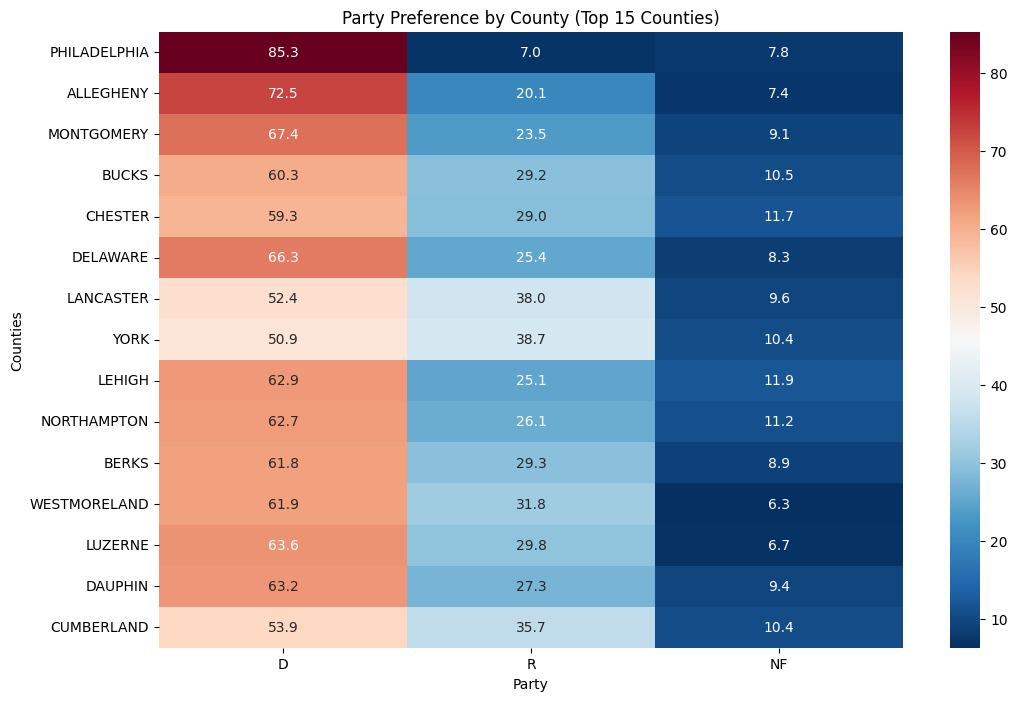

In [60]:
print("COUNTY vs PARTY PATTERNS")

# Clean data
df_clean = df.dropna(subset=['countyname', 'party'])
major_parties = ['D', 'R', 'NF']
df_major = df_clean[df_clean['party'].isin(major_parties)]

# County-Party cross-tab
county_party_counts = pd.crosstab(df_major['countyname'], df_major['party'])
county_party_pct = pd.crosstab(df_major['countyname'], df_major['party'], normalize='index') * 100

# Show most Democratic counties
dem_counties = county_party_pct.sort_values('D', ascending=False)
print("Most Democratic counties (by mail voting %):")
print(dem_counties[['D', 'R', 'NF']].head())

# Show most Republican counties  
rep_counties = county_party_pct.sort_values('R', ascending=False)
print("\nMost Republican counties (by mail voting %):")
print(rep_counties[['D', 'R', 'NF']].head())

# Plot heatmap
plt.figure(figsize=(12, 8))
# Top 15 counties by total requests
top_counties = df_major['countyname'].value_counts().head(15).index
county_subset = county_party_pct.loc[top_counties, ['D', 'R', 'NF']]

sns.heatmap(county_subset, annot=True, fmt='.1f', cmap='RdBu_r')
plt.title('Party Preference by County (Top 15 Counties)')
plt.ylabel('Counties')
plt.xlabel('Party')
plt.show()

In [48]:
print("KEY FINDINGS SUMMARY")

# Calculate key stats
total_records = len(df)
unreturned_ballots = df['ballotreturneddate'].isnull().sum()
unreturned_pct = (unreturned_ballots / total_records) * 100

# Geographic
top_county = df_geo['countyname'].value_counts().index[0]
top_county_pct = (df_geo['countyname'].value_counts().iloc[0] / len(df_geo)) * 100

# Demographics
median_age = df_age['age_2020'].median()
seniors_pct = ((df_age['age_2020'] >= 65).sum() / len(df_age)) * 100

# Party
dem_pct = ((df_major['party'] == 'D').sum() / len(df_major)) * 100

# Timing
median_response = df_timing['days_to_return'].median()
fast_pct = ((df_timing['days_to_return'] <= 7).sum() / len(df_timing)) * 100

# Congressional
top_congress = df_congress['congressional'].value_counts().index[0]
top_congress_count = df_congress['congressional'].value_counts().iloc[0]

findings = [
    f"1. SCALE: Analyzed {total_records:,} mail ballot requests statewide",
    f"2. UNRETURNED: {unreturned_pct:.1f}% of ballots were never returned ({unreturned_ballots:,} ballots)",
    f"3. GEOGRAPHY: {top_county} County leads with {top_county_pct:.1f}% of requests",
    f"4. AGE: Median voter age is {median_age:.0f}, seniors (65+) are {seniors_pct:.1f}% of mail voters",
    f"5. PARTY: Democrats represent {dem_pct:.1f}% of major party mail voters",
    f"6. SPEED: Median response time is {median_response:.0f} days, {fast_pct:.1f}% return within 1 week",
    f"7. CONGRESS: District {top_congress} has highest frequency ({top_congress_count:,} requests)"
]

for finding in findings:
    print(f"   {finding}")

print(f"\nIMPLICATIONS:")
print(f"   • High unreturned rate suggests need for better tracking systems")
print(f"   • Senior-heavy usage indicates need for age-appropriate support")
print(f"   • Democratic preference shows partisan patterns in mail voting")
print(f"   • Response time varies significantly across districts")
print(f"   • Geographic concentration requires targeted resource allocation")

KEY FINDINGS SUMMARY
   1. SCALE: Analyzed 3,079,710 mail ballot requests statewide
   2. UNRETURNED: 14.0% of ballots were never returned (431,654 ballots)
   3. GEOGRAPHY: PHILADELPHIA County leads with 14.2% of requests
   4. AGE: Median voter age is 57, seniors (65+) are 35.4% of mail voters
   5. PARTY: Democrats represent 64.2% of major party mail voters
   6. SPEED: Median response time is 29 days, 10.3% return within 1 week
   7. CONGRESS: District 3RD CONGRESSIONAL DISTRICT has highest frequency (258,020 requests)

IMPLICATIONS:
   • High unreturned rate suggests need for better tracking systems
   • Senior-heavy usage indicates need for age-appropriate support
   • Democratic preference shows partisan patterns in mail voting
   • Response time varies significantly across districts
   • Geographic concentration requires targeted resource allocation


In [62]:
# %%
# UNRETURNED BALLOTS BY COUNTY ANALYSIS

print("=== UNRETURNED BALLOTS BY COUNTY ===")

# Clean county data
df_county = df.dropna(subset=['countyname'])

# Identify unreturned ballots
df_county['ballot_returned'] = df_county['ballotreturneddate'].notnull()
df_county['ballot_unreturned'] = df_county['ballotreturneddate'].isnull()

# County-level analysis
county_analysis = df_county.groupby('countyname').agg({
    'ballot_unreturned': ['sum', 'count'],
    'ballot_returned': 'sum'
}).round(0)

# Flatten column names
county_analysis.columns = ['Unreturned_Count', 'Total_Requests', 'Returned_Count']

# Calculate unreturned percentage
county_analysis['Unreturned_Rate'] = (county_analysis['Unreturned_Count'] / county_analysis['Total_Requests']) * 100

# Sort by absolute number of unreturned ballots
county_unreturned = county_analysis.sort_values('Unreturned_Count', ascending=False)

print("TOP 15 COUNTIES BY UNRETURNED BALLOTS (Absolute Numbers):")
print("-" * 80)
print(f"{'County':<20} {'Unreturned':<12} {'Total Req':<12} {'Return Rate':<12} {'Unret %':<10}")
print("-" * 80)

for county, row in county_unreturned.head(15).iterrows():
    return_rate = (row['Returned_Count'] / row['Total_Requests']) * 100
    print(f"{county:<20} {row['Unreturned_Count']:<12.0f} {row['Total_Requests']:<12.0f} {return_rate:<12.1f}% {row['Unreturned_Rate']:<10.1f}%")

# Sort by unreturned percentage (rate)
county_unreturned_rate = county_analysis.sort_values('Unreturned_Rate', ascending=False)

print(f"\nTOP 15 COUNTIES BY UNRETURNED RATE (Percentage):")
print("-" * 80)
print(f"{'County':<20} {'Unret Rate':<12} {'Unreturned':<12} {'Total Req':<12}")
print("-" * 80)

for county, row in county_unreturned_rate.head(15).iterrows():
    print(f"{county:<20} {row['Unreturned_Rate']:<12.1f}% {row['Unreturned_Count']:<12.0f} {row['Total_Requests']:<12.0f}")



=== UNRETURNED BALLOTS BY COUNTY ===
TOP 15 COUNTIES BY UNRETURNED BALLOTS (Absolute Numbers):
--------------------------------------------------------------------------------
County               Unreturned   Total Req    Return Rate  Unret %   
--------------------------------------------------------------------------------
PHILADELPHIA         63318        437159       85.5        % 14.5      %
ALLEGHENY            63086        411251       84.7        % 15.3      %
MONTGOMERY           28626        273270       89.5        % 10.5      %
BUCKS                26938        192074       86.0        % 14.0      %
DELAWARE             21508        150369       85.7        % 14.3      %
LANCASTER            16732        107567       84.4        % 15.6      %
CHESTER              16066        167261       90.4        % 9.6       %
YORK                 15972        92458        82.7        % 17.3      %
WESTMORELAND         14724        74317        80.2        % 19.8      %
BERKS          

In [66]:
# Key statistics
total_unreturned = county_analysis['Unreturned_Count'].sum()
total_requests = county_analysis['Total_Requests'].sum()
overall_unreturned_rate = (total_unreturned / total_requests) * 100

# Top 3 counties contribution to unreturned ballots
top3_unreturned = county_unreturned.head(3)['Unreturned_Count'].sum()
top3_percentage = (top3_unreturned / total_unreturned) * 100

print(f" KEY INSIGHTS:")
print(f"   • Top 3 counties account for {top3_percentage:.1f}% of all unreturned ballots")
print(f"   • {county_unreturned.index[0]} has the most unreturned ballots: {county_unreturned.iloc[0]['Unreturned_Count']:,.0f}")
print(f"   • Highest unreturned rate: {county_unreturned_rate.index[0]} ({county_unreturned_rate.iloc[0]['Unreturned_Rate']:.1f}%)")
print(f"   • Lowest unreturned rate: {county_unreturned_rate.index[-1]} ({county_unreturned_rate.iloc[-1]['Unreturned_Rate']:.1f}%)")

 KEY INSIGHTS:
   • Top 3 counties account for 35.9% of all unreturned ballots
   • PHILADELPHIA has the most unreturned ballots: 63,318
   • Highest unreturned rate: MERCER (20.9%)
   • Lowest unreturned rate: PIKE (6.5%)
